<a href="https://colab.research.google.com/github/Jack3690/Kugelblitz/blob/main/notebooks/Multiangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def Fibonacci(n):
  a = 0
  b = 1
  c  = [a,b]
  i=2
  for i in range(i,n+1):
    d = a + b
    c.append( d )
    temp = b
    a = temp
    b = d
  return c[n]


In [ ]:
Fibonacci(20)

6765

In [ ]:
import sympy as smp
from sympy import *

In [ ]:
Gam , Bet, Ex, Ey, Ez, Bx, By, Bz, F_obj, Lambd_obj = smp.symbols('\gamma, \beta, E_x, E_y, E_z, B_x, B_y, B_z, F, \Lambda')

In [ ]:
F = smp.Matrix([[0, Ex, Ey, Ez], [-Ex,0,Bz,-By], [-Ey, -Bz,0,Bx], [-Ez,By,-Bx,0]])

Matrix([
[   0,  E_x,  E_y,  E_z],
[-E_x,    0,  B_z, -B_y],
[-E_y, -B_z,    0,  B_x],
[-E_z,  B_y, -B_x,    0]])

In [ ]:
Bet

eta

In [ ]:
Lambd = smp.Matrix([[Gam, -Gam*Bet, 0, 0], [-Gam*Bet,Gam,0,0], [0, 0,1,0], [0,0,0,1]])

In [ ]:
Trans = Lambd*F*(Lambd.T)
Trans

⎡                                     2          2            2               
⎢              0                - eta ⋅Eₓ⋅\gamma  + Eₓ⋅\gamma   -eta⋅B_z⋅\ga
⎢                                                                             
⎢    2          2            2                                                
⎢eta ⋅Eₓ⋅\gamma  - Eₓ⋅\gamma                  0                 -eta⋅E_y⋅\ga
⎢                                                                             
⎢eta⋅B_z⋅\gamma - E_y⋅\gamma    eta⋅E_y⋅\gamma - B_z⋅\gamma                 
⎢                                                                             
⎣-eta⋅B_y⋅\gamma - E_z⋅\gamma   eta⋅E_z⋅\gamma + B_y⋅\gamma                 

                                               ⎤
mma + E_y⋅\gamma  eta⋅B_y⋅\gamma + E_z⋅\gamma ⎥
                                               ⎥
                                               ⎥
mma + B_z⋅\gamma  -eta⋅E_z⋅\gamma - B_y⋅\gamma⎥
                                           

In [ ]:
import numpy as np
from scipy import linalg

def christoffel_symbols(g):
    """Calculates the Christoffel symbols from a given 4-dimensional metric tensor.

    Parameters:
    g (numpy.ndarray): The metric tensor, which should be a 2-dimensional numpy array of shape (4,4).

    Returns:
    numpy.ndarray: The Christoffel symbols, which will be a 3-dimensional numpy array of shape (4,4,4).
    """

    n = g.shape[0]
    c = np.zeros((n,n,n))

    g_inv = linalg.inv(g)

    for i in range(n):
        for j in range(n):
            for k in range(n):
                sum = 0
                for l in range(n):
                    df1 = partial_derivative(g, l, j, k, i)
                    df2 = partial_derivative(g, l, k, j, i)
                    df3 = partial_derivative(g, j, k, l, i)
                    args1 = [c,d for c,d in enumerate(np.ravel(g)) if c != i*4+j] + [args1[i*4+j] + h]
                    args2 = [c,d for c,d in enumerate(np.ravel(g)) if c != i*4+j] + [args2[i*4+j] - h]
                    sum += 0.5 * g_inv[i,l] * (f[tuple(args1)] - f[tuple(args2)]) / (2 * h)
                c[i,j,k] = sum

    return c

def partial_derivative(f, a, b, c, d, h=1e-8):
    """Calculates the partial derivative of a function f with respect to its argument a.

    Parameters:
    f (numpy.ndarray): The function to differentiate, which should be a 2-dimensional numpy array of shape (4,4).
    a (int): The first index of the argument to differentiate with respect to.
    b (int): The second index of the argument to differentiate with respect to.
    c (int): The third index of the argument to differentiate with respect to.
    d (int): The fourth index of the argument to differentiate with respect to.
    h (float, optional): The step size for the finite difference approximation.

    Returns:
    float: The partial derivative of f with respect to its argument a.
    """

    args1 = list(np.ravel(f))
    args1[a*4 + b] += h
    args2 = list(np.ravel(f))
    args2[a*4 + b] -= h

    df = (f[tuple(args1)] - f[tuple(args2)]) / (2 * h)

    return df

# Example usage:
g = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
c = christoffel_symbols(g)
print(c)


SyntaxError: ignored

# Multiangle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45, solve_ivp
import os
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.size']      = 10

In [ ]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [ ]:
class SN_wrap_v2():
  def __init__(self,n1,n2):

    self.n1    = n1           #E bins
    self.n2    = n2           #Theta bins
    if n1>1:
      self.E     = np.linspace(0,50,n1+1)[:-1]
      self.E    += (self.E[1]-self.E[0])*0.5
    else :
      self.E = [25]

    if n2>1:
      self.thetas = np.linspace(0,np.pi/2,n2+1)[:-1]
      self.thetas += (self.thetas[1]-self.thetas[0])*0.5
      self.thetas = self.thetas.reshape(-1,1)
    else :
      self.thetas = np.array([np.pi/4]).reshape(-1,1)

    self.int_p_theta = 0

    self.I = []
    for E_o in self.E:
      self.I.append(np.array([[self.A(E_o)]*3 + [self.B(E_o)]*3]*self.n2))   #Creates an tensor with 3 copies of x's and y's to be multiplied by the P's and Pbar's

    self.I = np.array(self.I).reshape(self.n1,self.n2,6)

    self.t     = None
    self.out   = None

    P0 = []
    for E_bin in self.E:
      P0 += self.P_init(E_bin)*self.n2   #Makes copies of initial value for the T bins and E bins = P0
    P0 = np.array(P0)
    self.P0 = P0

  def init_E_P_theta(self):
    return self.P0.reshape(self.n1,self.n2,6), self.E,self.thetas

  def __call__(self,t,P):

   return self.SN_self_v3(t,P,self.E,self.thetas,self.I)

  def P_init(self,E):                    # Generates initial values of P and Pbar
    P1 =  [0,0,(self.phi(E,0.315)/10 - self.phi(E,0.131)/24)/(self.phi(E,0.315)/10 + self.phi(E,0.131)/24 )]
    P2 =  [0,0,(self.phi(E,0.210)/15 - self.phi(E,0.131)/24)/(self.phi(E,0.210)/15 + self.phi(E,0.131)/24 )]

    return P1 + P2                      #Returns a vector with dim 6

  def omega(self,E):                              # Vacuum potential calc func
    dm2 = 2 * 10**-9                              # In terms of eV
    conv = 0.506 * 10**10                         # conversion factor eV -> 1/km
    w = (dm2 * conv)/(2*E)
    return w

  def cos_theta(self,theta_o,r):
    R = 10
    return pow( 1- pow(R/r,2)*(1-pow(np.cos(theta_o),2)),0.5)

  def dcos_theta(self,theta_o,r,dcos_theta_o):

    R = 10
    A = pow(R/r,2)*np.cos(theta_o)
    B = self.cos_theta(theta_o,r)

    return (A/B)*dcos_theta_o

  def phi(self,E,beta):                  #Energy distribution function
    zeta =1.202
    return(2/3)*(beta/zeta)*(beta*E)**2/(np.exp(beta*E) + 1)

  def A(self, E):                        #E distribution of neutrinos =x
    return self.phi(E,0.315)/10 + self.phi(E,0.131)/24

  def B(self,E):                        #E distribution of anti-neutrinos =y
    return self.phi(E,0.210)/15 + self.phi(E,0.131)/24

  def SN_self_v3(self,t,P,E,thetas,I):    # Multiangle system definition

    dE      = 2*E[0]

    theta_v = 0.01                        # theta vacuum

    lambd   = 0.75e6*pow(t,-2.2)         # Matter potential

    mu_p    = 2.123e6

    P       = P.reshape(self.n1,self.n2,6)

    int_E = (I*P).sum(axis=0)           #Does element wise multiplication of xP and yP_b and stores it in the object

    int_E = int_E[:,0:3] - int_E[:,3:6]   #Separates xP and yP_b and subtracts it

    E_bin = E
    theta_bin = thetas

    U = []

    for theta_bin in thetas:
      U.append(self.dcos_theta(thetas,t,1/self.n2)*(1-self.cos_theta(theta_bin,t)*self.cos_theta(thetas,t)))  #Creates an array of A_i's

    U = np.array(U).reshape(self.n2,self.n2,1) #Reshapes it into the correct shape

    int_D = (U*int_E).sum(axis=1)*dE         #Multiplies it with int_E element wise to get A1(x1P11-y1Pb11 + x2P21-y2Pb21 +...) + A2(x1P12-y1Pb12 + ...) +...

    w = self.omega(E_bin)

    P1, P2 = P[:,:,0:3], P[:,:,3:6]

    H1 = (np.array(  [ w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w, lambd + w*np.cos(2*theta_v)]).T.reshape(self.n1,1,3) + mu_p*int_D)/self.cos_theta(thetas,t).reshape(1,self.n2,1)

    H2 = (np.array(  [ -w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w , lambd - w*np.cos(2*theta_v)]).T.reshape(self.n1,1,3) + mu_p*int_D)/self.cos_theta(thetas,t).reshape(1,self.n2,1)

    dP1dt = np.cross(H1, P1)
    dP2dt = np.cross(H2, P2)

    dPdt = np.concatenate((dP1dt,dP2dt),axis=2)

    return dPdt

  def solver(self,t0=40,tf=200):

    t_span=(t0,tf)
    sol = RK45(self,t0,self.P0,tf,vectorized=True)#rtol=1e-7,atol=1e-15)

    t_values = []
    y_values = []

    while(True):
      # Get solution step state
      sol.step()
      t_values.append(sol.t)
      y_values.append(sol.y)

      # Break loop after modeling is finished
      if sol.status == 'finished':
        break

    t   = np.array(t_values)
    out = np.array(y_values)

    self.t = t
    self.out = out.reshape(-1,self.n1,self.n2,6)

    costheta = np.cos(self.thetas).reshape(1,1,-1,1)
    self.int_p_theta = (costheta*self.out.reshape(-1,self.n1,self.n2,6)).sum(axis=2)/costheta.sum()

    self.int_p_theta

    return self.t, self.out

  def show_plot(self,bins=None):
    if bins==None:
      E_bins = np.arange(0,self.n2,1)
    else :
      E_bins = bins
    for j in range(self.n2):
      for i in E_bins:
        plt.plot(t,self.out.reshape(-1,self.n1,self.n2,6)[:,i,j,2],label = r'$P_z$({})'.format(E[i]))
        plt.plot(t,self.out.reshape(-1,self.n1,self.n2,6)[:,i,j,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
      plt.title(f'Theta : {theta[j][0]}')
      plt.xlabel('r (km)')
      plt.legend()
      plt.show()
      plt.close()

  def plot_intP(self,bins=None):

    if bins==None:
      E_bins = np.arange(0,self.n2,1)
    else :
      E_bins = bins

    fig,ax = plt.subplots(1,2,figsize=(30,8))

    for i in E_bins:
        ax[0].plot(t,self.int_p_theta[:,i,2],label = r'$P_z$({})'.format(E[i]))
        ax[0].set_title(r'$<P_{\theta}>$', fontsize=15)
        ax[0].set_xlabel('r (km)')
        ax[0].legend()
    for i in E_bins:
        ax[1].plot(t,self.int_p_theta[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
        ax[1].set_title(r'$\overline{P_z}$' + '({})', fontsize=15)
        ax[1].set_xlabel('r (km)')
        ax[1].legend()


    plt.title(r'$<P_{\theta}>$', fontsize=15)
    plt.show()


  def J_J_bar(self):
     if self.out is not None:
      dE = 2*self.E[0]
      I = self.I[:,0,:]
      int_D = (I*self.int_p_theta).sum(axis=1)

      J     = int_D[:,0:3]*dE/2
      J_bar = int_D[:,3:6]*dE/2

      #Diff = (J-J_bar)*(2*np.pi/(self.A + self.B)*dE).sum(axis=0)

      return J,J_bar

In [ ]:
SN_obj = SN_wrap_v2(n1=50,n2=50)

P0, E, theta = SN_obj.init_E_P_theta()

In [ ]:
t, out = SN_obj.solver()
print(E)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5]


In [ ]:
SN_obj.int_p_theta.shape

(7094, 50, 6)

In [ ]:
def plot_intP(SN_obj,bins=None):

    if bins==None:
      E_bins = np.arange(0,SN_obj.n2,1)
    else :
      E_bins = bins

    fig,ax = plt.subplots(1,2,figsize=(30,8))

    for i in E_bins:
        ax[0].plot(t,SN_obj.int_p_theta[:,i,2],label = r'$P_z$({})'.format(E[i]))
        ax[0].set_title(r'$<P_{\theta}>$', fontsize=15)
        ax[0].set_xlabel('r (km)')
        ax[0].legend()
    for i in E_bins:
        ax[1].plot(t,SN_obj.int_p_theta[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
        ax[1].set_title(r'$<\overline{P_\theta}>$', fontsize=15)
        ax[1].set_xlabel('r (km)')
        ax[1].legend()

In [ ]:
#[3,7,11,14,18] - 30 bins
#[5,12,19,23,31] - 50 bins

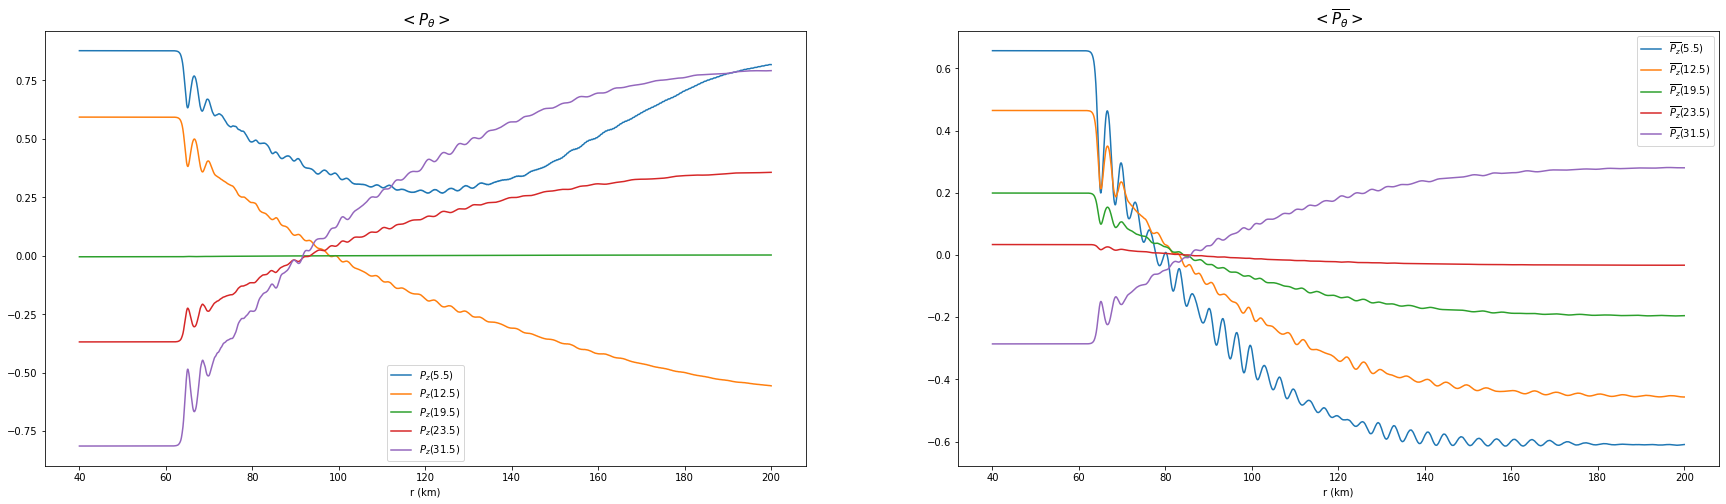

In [ ]:
plot_intP(SN_obj,bins=[5,12,19,23,31])
plt.savefig('Multiangle-result_(50,50).jpeg')

In [ ]:
!ls
!scp 'Multiangle-result (30,150), r=40.jpeg'


sample_data
usage: scp [-346BCpqrv] [-c cipher] [-F ssh_config] [-i identity_file]
           [-l limit] [-o ssh_option] [-P port] [-S program]
           [[user@]host1:]file1 ... [[user@]host2:]file2


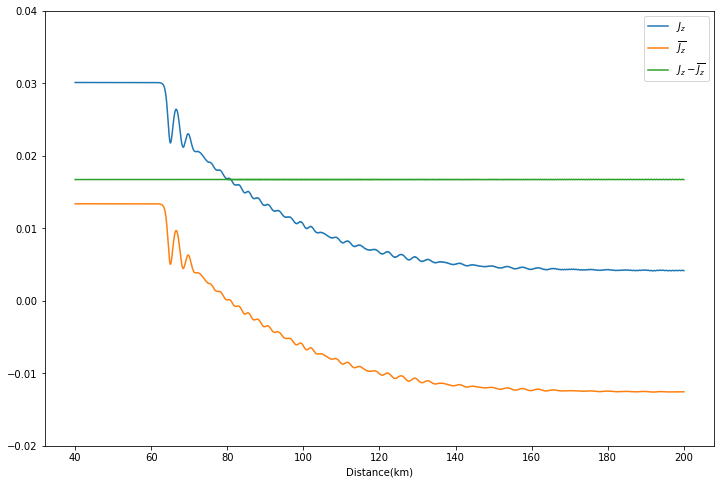

In [ ]:
J, J_bar = SN_obj.J_J_bar()
plt.plot(t,J[:,2])
plt.plot(t,J_bar[:,2])
diff = J[:,2] - J_bar[:,2]
#plt.plot(t,Diff[:,2])
plt.plot(t,diff)
plt.xlabel('Distance(km)')
plt.ylim([-0.02,0.04])
plt.legend([r'$J_z$',r'$\overline{J_z}$',r'$J_z - \overline{J_z}$'])
plt.savefig('Dz,ma(50,50,r=40).jpeg')

In [ ]:
dE = 1/SN_obj.n2
integrate_E=sum(((SN_obj.A(SN_obj.E) + SN_obj.B(SN_obj.E))*dE/2))
integrate_E

0.0012302255014515486

In [ ]:
SN_obj.show_plot(bins=[5,12,19,23,31])
plt.savefig('Bins plot.jpeg')

Text(0, 0.5, 'Counts')

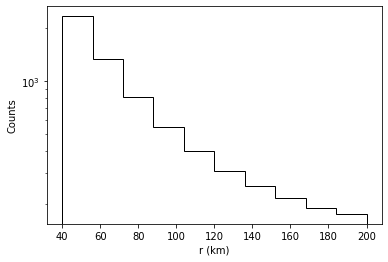

In [ ]:
plt.hist(t,histtype = 'step',color='black')
plt.yscale('log')
plt.xlabel('r (km)')
plt.ylabel('Counts')

In [ ]:
P_e = 0.5*(1+SN_obj.int_p_theta[-1]/P0[:,0,:])
#P_e = 1 - P_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


NameError: ignored

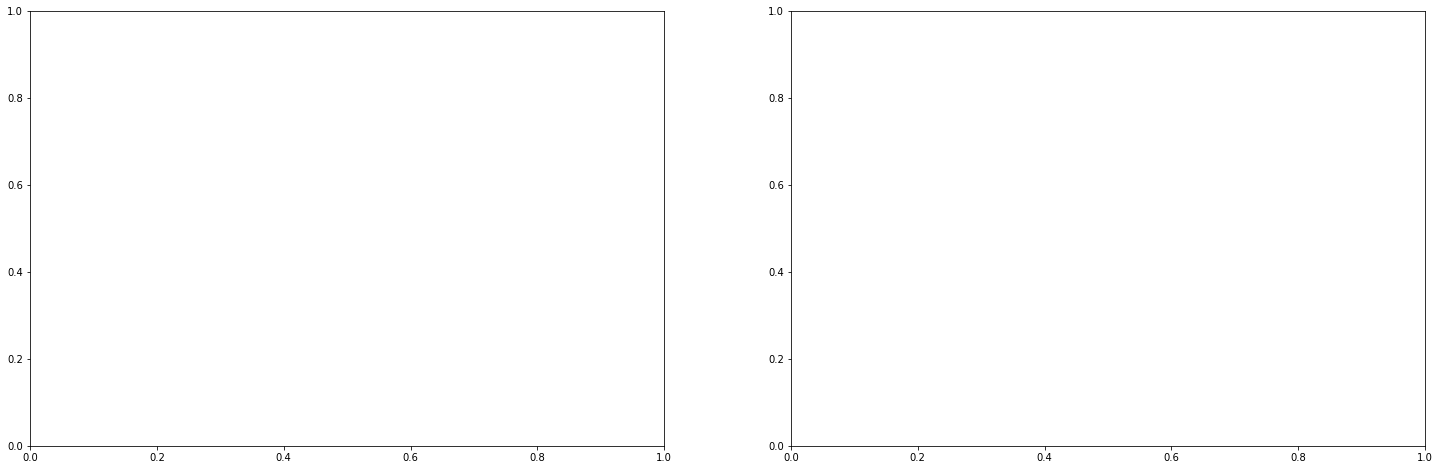

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (25,8))

ax[0].plot(E,P_e[:,2],label = r'$P_z$({})'.format(E[i]))
ax[1].plot(E,P_e[:,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))

ax[0].legend()
ax[0].set_xlabel('r (km)')
ax[0].set_title(r'$P_{ee}$')

ax[1].legend()
ax[1].set_xlabel('r (km)')
ax[1].set_title(r'$P_{eb}$')

In [ ]:
v_e = (SN_obj.phi(E,0.315).reshape(-1,1)/0.10)*P_e +  (SN_obj.phi(E,0.131).reshape(-1,1)/0.24)*(1-P_e)
v_x = (SN_obj.phi(E,0.131).reshape(-1,1)/0.24)*P_e +  (SN_obj.phi(E,0.315).reshape(-1,1)/0.10)*(1-P_e)

v_eb = (SN_obj.phi(E,0.210).reshape(-1,1)/0.15)*P_e +  (SN_obj.phi(E,0.131).reshape(-1,1)/0.24)*(1-P_e) #nubars
v_xb = (SN_obj.phi(E,0.131).reshape(-1,1)/0.24)*P_e +  (SN_obj.phi(E,0.210).reshape(-1,1)/0.15)*(1-P_e)

v_ee = v_e[:,2]
v_xx = v_x[:,2]

v_eb = v_eb[:,5]
v_xb = v_xb[:,5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in add
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


In [ ]:
P_e.shape

(50, 6)

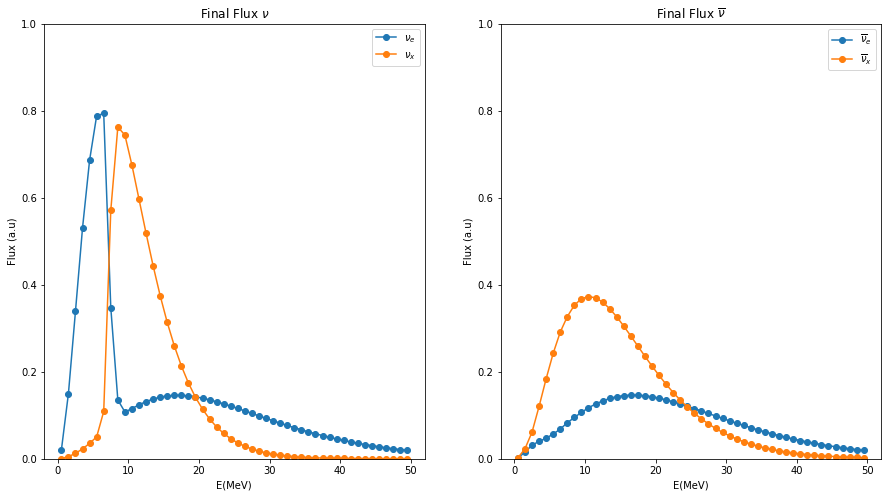

<Figure size 432x288 with 0 Axes>

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (15,8))

axis[0].plot(E,v_ee,'o-', label = r'$\nu_e$')
axis[0].plot(E,v_xx,'o-', label = r'$\nu_x$')

axis[0].set_ylim(0,1)

axis[1].plot(E,v_eb,'o-', label = r'$\overline{\nu}_e$')
axis[1].plot(E,v_xb,'o-', label = r'$\overline{\nu}_x$')

axis[1].set_ylim(0,1)

axis[0].title.set_text(r'Final Flux $\nu$')
axis[1].title.set_text(r'Final Flux $\overline{\nu}$')
plt.setp(axis[0], xlabel='E(MeV)')
plt.setp(axis[0], ylabel='Flux (a.u)')
plt.setp(axis[1], xlabel='E(MeV)')
plt.setp(axis[1], ylabel='Flux (a.u)')
axis[0].legend()
axis[1].legend()
plt.show()
#plt.savefig('Final Flux (50,150) ma.jpeg')

In [ ]:
np.save("result",out)

In [ ]:
load = np.load('result.npy')

In [ ]:
costheta = np.cos(SN_obj.thetas).reshape(1,1,-1,1)
int_p_theta = (costheta*load.reshape(-1,SN_obj.n1,SN_obj.n2,6)).sum(axis=2)/costheta.sum()
int_p_theta

array([[[ 1.75129422e-04, -8.01393695e-04,  5.93460595e-01,
         -4.00390206e-04,  4.52965275e-04,  4.64471624e-01],
        [ 8.49080721e-05,  5.37647084e-04, -9.34470145e-01,
          2.33103584e-04, -9.77517351e-05, -4.89124775e-01]],

       [[ 8.04358775e-04, -1.52556599e-03,  5.93458607e-01,
         -1.08329029e-03,  1.10034134e-04,  4.64470629e-01],
        [-1.17529702e-04,  1.52865601e-03, -9.34468928e-01,
          5.39726775e-04,  3.42392008e-04, -4.89124334e-01]],

       [[ 2.02148617e-03, -1.79430653e-03,  5.93454797e-01,
         -1.03420824e-03, -9.42764300e-04,  4.64469424e-01],
        [-1.42914626e-03,  2.51784126e-03, -9.34465311e-01,
          1.70347887e-04,  1.15588377e-03, -4.89123066e-01]],

       ...,

       [[-3.07869445e-01,  6.88444167e-03,  1.37594471e-01,
          5.62517570e-02, -2.98538280e-01, -1.45430972e-01],
        [-5.85498553e-01,  2.51702691e-01, -2.06524570e-01,
          4.26108915e-01, -1.03664270e-01, -2.90293246e-03]],

       [[-1

In [ ]:
def plot_intP(self,bins=None):
  if bins==None:
      E_bins = np.arange(0,self.n2,1)
  else :
      E_bins = bins

  fig,ax = plt.subplots(1,2,figsize=(30,8))

  for i in E_bins:
        ax[0].plot(t,int_p_theta[:,i,2],label = r'$P_z$({})'.format(E[i]))
        ax[0].set_title(r'$<P_{\theta}>$', fontsize=15)
        ax[0].set_xlabel('r (km)')
        ax[0].legend()
  for i in E_bins:
        ax[1].plot(t,int_p_theta[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
        ax[1].set_title(r'$\overline{P_z}$' + '({})', fontsize=15)
        ax[1].set_xlabel('r (km)')
        ax[1].legend()


  plt.title(r'$<P_{\theta}>$', fontsize=15)
  plt.show()


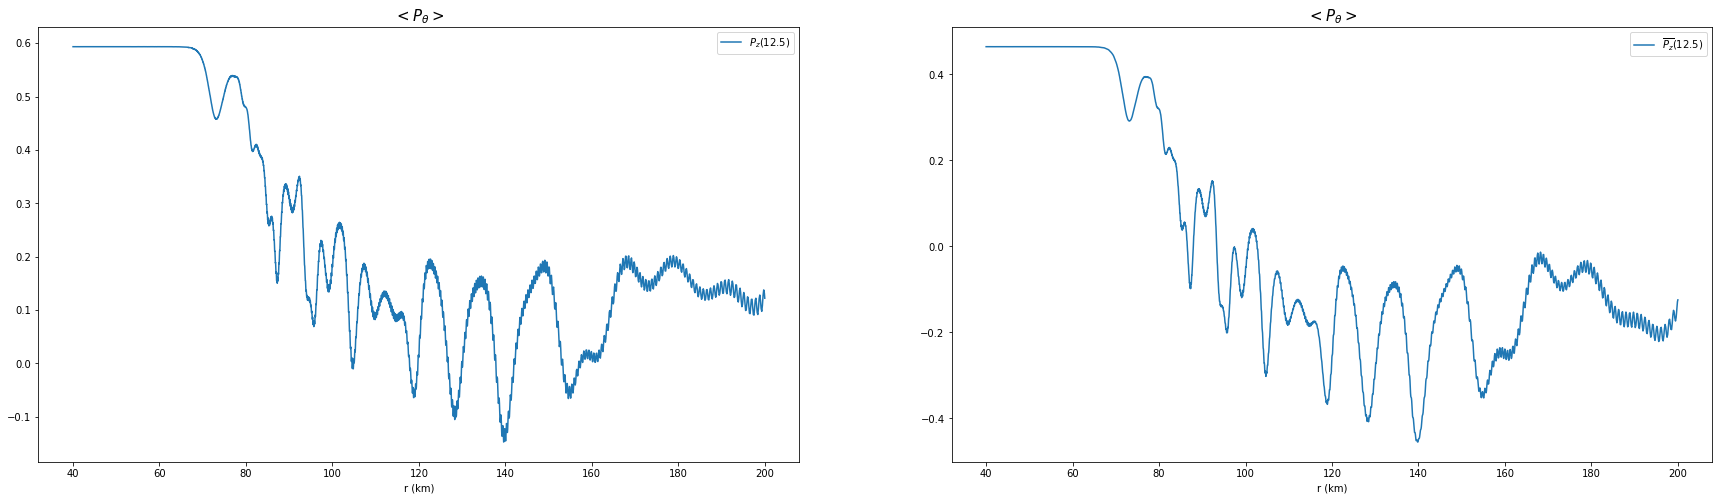

In [ ]:
plot_intP(SN_obj,bins=[0])

In [ ]:
print("Hello World")

Hello World



# New Algorithm



In [ ]:
class SN_wrap_v2():
  def __init__(self,n1,n2,P0=None):

    self.n1    = n1           #E bins
    self.n2    = n2           #Theta bins
    if n1>1:
      self.E     = np.linspace(0,50,n1+1)[:-1]
      self.E    += (self.E[1]-self.E[0])*0.5
    else :
      self.E = [25]

    if n2>1:
      self.thetas = np.linspace(0,np.pi/2,n2+1)[:-1]
      self.thetas += (self.thetas[1]-self.thetas[0])*0.5
      self.thetas = self.thetas.reshape(-1,1)
    else :
      self.thetas = np.array([np.pi/4]).reshape(-1,1)

    self.int_p_theta = 0

    self.I = []
    for E_o in self.E:
      self.I.append(np.array([[self.A(E_o)]*3 + [self.B(E_o)]*3]*self.n2))

    self.I = np.array(self.I).reshape(self.n1,self.n2,6)

    self.t     = None
    self.out   = None

    if np.any(P0) ==None:
      P0 = []
      for E_bin in self.E:
        P0 += self.P_init(E_bin)*self.n2   #Makes copies of initial value for the theta bins
      P0 = np.array(P0)
      self.P0 = P0
    else :
      self.P0 = P0

  def init_E_P_theta(self):
    return self.P0.reshape(self.n1,self.n2,6), self.E,self.thetas

  def __call__(self,t,P):

   return self.SN_self_v3(t,P,self.E,self.thetas,self.I)

  def P_init(self,E):                    # Generates initial values of P and Pbar
    P1 =  [0,0,(self.phi(E,0.315)/10 - self.phi(E,0.131)/24)/(self.phi(E,0.315)/10 + self.phi(E,0.131)/24 )]
    P2 =  [0,0,(self.phi(E,0.210)/15 - self.phi(E,0.131)/24)/(self.phi(E,0.210)/15 + self.phi(E,0.131)/24 )]

    return P1 + P2

  def omega(self,E):                                   # Vacuum potential calc func
    dm2 = 2 * 10**-9                              # In terms of eV
    conv = 0.506 * 10**10                         # conversion factor eV -> 1/km
    w = (dm2 * conv)/(2*E)
    return w

  def cos_theta(self,theta_o,r):
    R = 10
    return pow( 1- pow(R/r,2)*(1-pow(np.cos(theta_o),2)),0.5)

  def dcos_theta(self,theta_o,r,dcos_theta_o):

    R = 10
    A = pow(R/r,2)*np.cos(theta_o)
    B = self.cos_theta(theta_o,r)

    return (A/B)*dcos_theta_o

  def phi(self,E,beta):                  #Energy distribution function
    zeta =1.202
    return(2/3)*(beta/zeta)*(beta*E)**2/(np.exp(beta*E) + 1)

  def A(self, E):                        #E distribution of neutrinos
    return self.phi(E,0.315)/10 + self.phi(E,0.131)/24

  def B(self,E):                    #E distribution of anti-neutrinos
    return self.phi(E,0.210)/15 + self.phi(E,0.131)/24

  def SN_self_v3(self,t,P,E,thetas,I):    # Multiangle system

    dE      = 2*E[0]

    theta_v = 0.6                        # theta vacuum

    lambd   = 0.75e6*pow(t,-2.2)         # Matter potential

    mu_p    = 2.123e6

    P       = P.reshape(self.n1,self.n2,6)

    int_E = (I*P).sum(axis=0)

    int_E = int_E[:,0:3] - int_E[:,3:6]

    E_bin = E
    theta_bin = thetas

    U = []

    for theta_bin in thetas:
      U.append(self.dcos_theta(thetas,t,1/self.n2)*(1-self.cos_theta(theta_bin,t)*self.cos_theta(thetas,t)))

    U = np.array(U).reshape(self.n2,self.n2,1)

    int_D = (U*int_E).sum(axis=1)*dE/2

    w = self.omega(E_bin)

    P1, P2 = P[:,:,0:3], P[:,:,3:6]

    H1 = (np.array(  [ w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w, lambd + w*np.cos(2*theta_v)]).T.reshape(self.n1,1,3) + mu_p*int_D)/self.cos_theta(thetas,t).reshape(1,self.n2,1)

    H2 = (np.array(  [ -w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w , lambd - w*np.cos(2*theta_v)]).T.reshape(self.n1,1,3) + mu_p*int_D)/self.cos_theta(thetas,t).reshape(1,self.n2,1)

    dP1dt = np.cross(H1, P1)
    dP2dt = np.cross(H2, P2)

    dPdt = np.concatenate((dP1dt,dP2dt),axis=2)

    return dPdt

  def solver(self,t0=40,tf=200):

    t_span=(t0,tf)

    sol = solve_ivp(self,t_span, self.P0.reshape(-1),method='DOP853', vectorized=True)

    t   = sol.t
    out = sol.y


    self.t = t
    self.out = out.T.reshape(-1,self.n1,self.n2,6)

    costheta = np.cos(self.thetas).reshape(1,1,-1,1)
    self.int_p_theta = (costheta*self.out.reshape(-1,self.n1,self.n2,6)).sum(axis=2)/costheta.sum()

    self.int_p_theta

    return self.t, self.out

  def calc_int_p_theta(self):
    costheta = np.cos(self.thetas).reshape(1,1,-1,1)
    self.int_p_theta = (costheta*self.out.reshape(-1,self.n1,self.n2,6)).sum(axis=2)/costheta.sum()
    return self.int_p_theta

  def plot_intP(self,bins=None):

    if bins==None:
      E_bins = np.arange(0,SN_obj.n2,1)
    else :
      E_bins = bins

    fig,ax = plt.subplots(1,2,figsize=(30,8))

    for i in E_bins:
        ax[0].plot(t,self.int_p_theta[:,i,2],label = r'$P_z$({})'.format(E[i]))
        ax[0].set_title(r'$<P_{\theta}>$', fontsize=15)
        ax[0].set_xlabel('r (km)')
        ax[0].legend()
    for i in E_bins:
        ax[1].plot(t,self.int_p_theta[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
        ax[1].set_title(r'$<\overline{P_\theta}>$', fontsize=15)
        ax[1].set_xlabel('r (km)')
        ax[1].legend()


  def J_J_bar(self):
     if self.out is not None:
      dE = 2*self.E[0]
      I = self.I[:,0,:]
      int_D = (I*self.int_p_theta).sum(axis=1)

      J     = int_D[:,0:3]*dE/2
      J_bar = int_D[:,3:6]*dE/2

      return J,J_bar

In [ ]:
def __init__(SN_obj):
#Trying to manufacture I locally
    n1    = 65           #E bins
    n2    = 250          #Theta bins
    if n1>1:
      E     = np.linspace(0,50,n1+1)[:-1]
      E    += (SN_obj.E[1]-SN_obj.E[0])*0.5
    else :
      E = [25]

    if n2>1:
      thetas = np.linspace(0,np.pi/2,n2+1)[:-1]
      thetas += (SN_obj.thetas[1]-SN_obj.thetas[0])*0.5
      thetas = SN_obj.thetas.reshape(-1,1)
    else :
      thetas = np.array([np.pi/4]).reshape(-1,1)

    int_p_theta = 0

    I = []
    for E_o in E:
      I.append(np.array([[SN_obj.A(E_o)]*3 + [SN_obj.B(E_o)]*3]*n2))

    I = np.array(I).reshape(n1,n2,6)
    return I


#I = __init__(SN_obj)
#np.save('I.npy',I)
#ls -l I.npy

In [ ]:
def J_J_bar(Int_P,I):
      dE = 2*E[0]
      I = I[:,0,:]
      int_D = (I*Int_P).sum(axis=1)

      J     = int_D[:,0:3]*dE/2
      J_bar = int_D[:,3:6]*dE/2

      return J,J_bar

In [ ]:
if not os.path.exists('data_LSODA'):
  os.system('mkdir data_LSODA')
  os.system('mkdir data_LSODA/data_t')
  os.system('mkdir data_LSODA/data_out')
  os.system('mkdir data_LSODA/data_intP')
else:
  os.system('rm -r data_LSODA')
  os.system('mkdir data_LSODA')
  os.system('mkdir data_LSODA/data_t')
  os.system('mkdir data_LSODA/data_out')
  os.system('mkdir data_LSODA/data_intP')

SN_obj = SN_wrap_v2(n1=2,n2=2)

P0, E, theta = SN_obj.init_E_P_theta()
init_P0 = P0
t, out = SN_obj.solver(40,50)
intP = SN_obj.calc_int_p_theta()
t_in = 40
dt   = 10
r = np.linspace(t_in,200,dt)
np.save(f'data_LSODA/data_t/{t_in}.npy',t)
np.save(f'data_LSODA/data_out/{t_in}.npy',out)
np.save(f'data_LSODA/data_intP/{t_in}.npy',intP)
t_in += dt

while t_in<200:
  P0 = []
  for i in range(SN_obj.n1)  :
    for j in range(SN_obj.n2):
      P0+= list(out[-1,i,j])
  P0 = np.array(P0)
  SN_obj = SN_wrap_v2(n1=SN_obj.n1,n2=SN_obj.n2, P0=P0)
  P0, E, theta = SN_obj.init_E_P_theta()
  t, out = SN_obj.solver(t_in,t_in+10)
  intP = SN_obj.calc_int_p_theta()
  np.save(f'data_LSODA/data_t/{t_in}.npy',t)
  np.save(f'data_LSODA/data_out/{t_in}.npy',out)
  np.save(f'data_LSODA/data_intP/{t_in}.npy',intP)
  t_in += dt


In [ ]:
r = np.arange(40,200,10)

t_m = list(np.load(f'data_LSODA/data_t/{int(r[0])}.npy'))
for f in r[1:]:
  temp = np.load(f'data_LSODA/data_t/{int(f)}.npy')
  t_m += list(temp[1:])
t_m = np.array(t_m)

#out_m = np.load(f'data_LSODA/data_out/{int(r[0])}.npy')
#for f in r[1:]:
#  temp = np.load(f'data_LSODA/data_out/{int(f)}.npy')
#  out_m = np.concatenate((out_m[1:],temp),axis=0)

intP_m = np.load(f'data_LSODA/data_intP/{int(r[0])}.npy')
for f in r[1:]:
  temp = np.load(f'data_LSODA/data_intP/{int(f)}.npy')
  intP_m = np.concatenate((intP_m[1:],temp),axis=0)

In [ ]:
np.save('t_values_LSODA', t_m)
np.save('IntP_LSODA', intP_m)
np.save('E_values_LSODA',E)

In [ ]:
intP_m.shape

(2800, 2, 6)

In [ ]:
SN_obj.out = out_m
SN_obj.t   = t_m
SN_obj.P0  = init_P0




In [ ]:
np.save('t_values_LSODA', t_m)
np.save('IntP_LSODA', IntP)
np.save('E_values_LSODA',E)

In [ ]:
def calc_int_p_theta(SN_obj):
    costheta = np.cos(SN_obj.thetas).reshape(1,1,-1,1)
    int_p_theta = (costheta*out_m.reshape(-1,SN_obj.n1,SN_obj.n2,6)).sum(axis=2)/costheta.sum()
    return int_p_theta

In [ ]:
IntP.shape

(2800, 2, 6)

# Data Loading Deck


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45, odeint, solve_ivp
from scipy.interpolate import interp1d
from astropy.modeling import models, fitting
import matplotlib
import pandas as pd
import os

matplotlib.rcParams['figure.figsize'] = (8,5)
matplotlib.rcParams['font.size']      = 13

In [ ]:
t = np.load('/content/t_values_DOPAngleInd_50deg.npy')

In [ ]:
intP_m = np.load('/content/IntP_DOPAngleInd_50deg.npy')

In [ ]:
out_zero = np.load('/content/out_0bin_50deg.npy')

In [ ]:
out_zero.shape

(568258, 6)

In [ ]:
t.shape

(7538527,)

In [ ]:
E = np.load('E_values_DOP65E1e-10.npy')

In [ ]:
P0i = np.load('P0i_import.npy')
Pf = intP_m[:,:,2]
Pfb = intP_m[:,:,5]
Pi = P0i[:,0,2]
Pib = P0i[:,0,5]

P_ee = 0.5*(1+ Pf/Pi)
P_eeb = 0.5*(1 + Pfb/Pib)

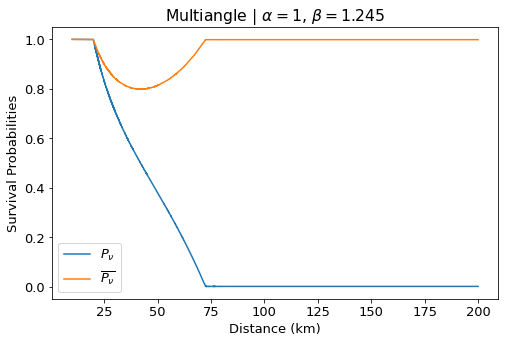

In [ ]:
plt.plot(t,P_ee, label = r'$P_{\nu}$')
plt.plot(t, P_eeb,label = r'$\overline{P_{\nu}}$')
plt.title(r'Multiangle | $\alpha = 1$, $\beta = 1.245$')
plt.xlabel('Distance (km)')
plt.ylabel('Survival Probabilities')
#plt.axvline(x=88,alpha=0.4,color='grey')
#plt.axvline(x=187,alpha=0.4,color='grey')
#plt.text(85,0,'x=88',color='grey',alpha=0.7,rotation=90)
#plt.text(188,0,'x=187',color='grey',alpha=0.7,rotation=270)
#plt.ylim(0,1)
plt.legend()
plt.savefig('MA_AngleIndependentP_surv_50deg.pdf')


In [ ]:
out_zero.shape

(568258, 6)

In [ ]:
def plot_intP(bins=None):

    if bins==None:
      E_bins = np.arange(0,SN_obj.n2,1)
    else :
      E_bins = bins

    fig,ax = plt.subplots(1,2,figsize=(30,8))

    for i in E_bins:
        ax[0].plot(t,Int_P[:,i,2],label = r'$P_z$({})'.format(E[i]))
        ax[0].set_title(r'$<P_{\theta}>$', fontsize=15)
        ax[0].set_xlabel('r (km)')
        ax[0].set_ylim(-1,1)
        ax[0].legend()
    for i in E_bins:
        ax[1].plot(t,Int_P[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
        ax[1].set_title(r'$<\overline{P_\theta}>$', fontsize=15)
        ax[1].set_xlabel('r (km)')
        ax[1].set_ylim(-1,1)
        ax[1].legend()

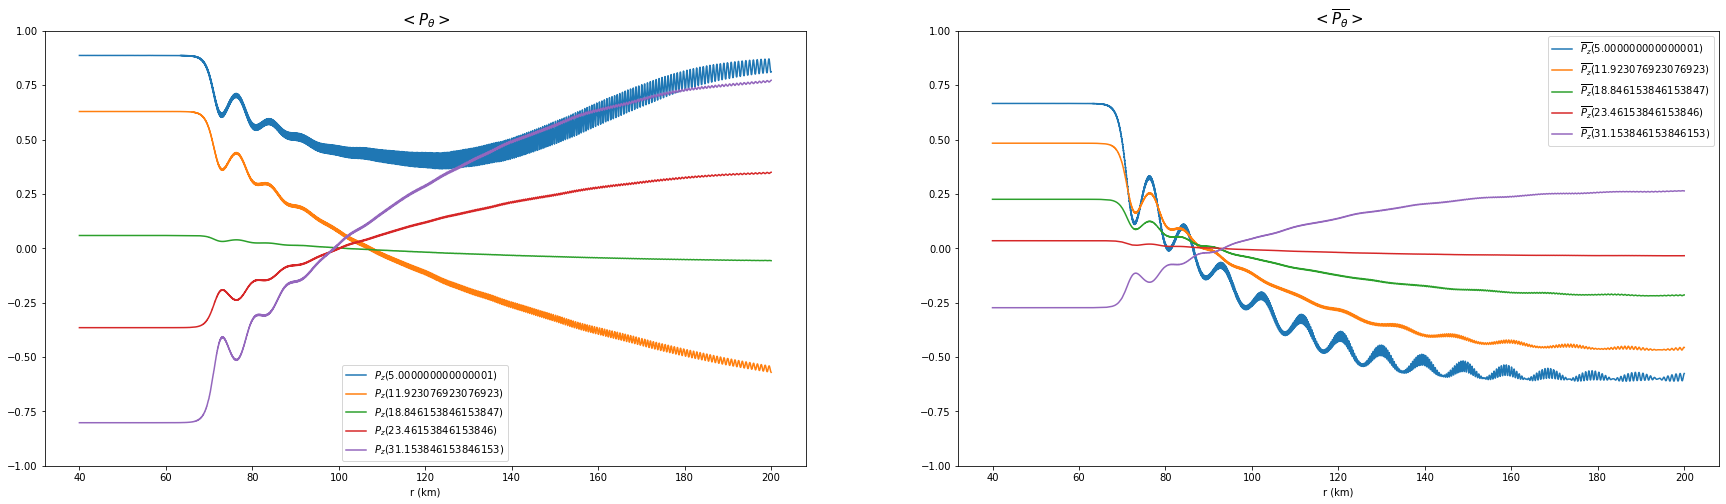

In [ ]:
plot_intP(bins=[6,15,24,30,40])
#plt.savefig('DOPRI_DOPr1e12_65E.jpeg')

In [ ]:
J = np.load('J_DOPr1e12_65E.npy')

In [ ]:
J_bar = np.load('J_bar_DOPr1e12_65E.npy')

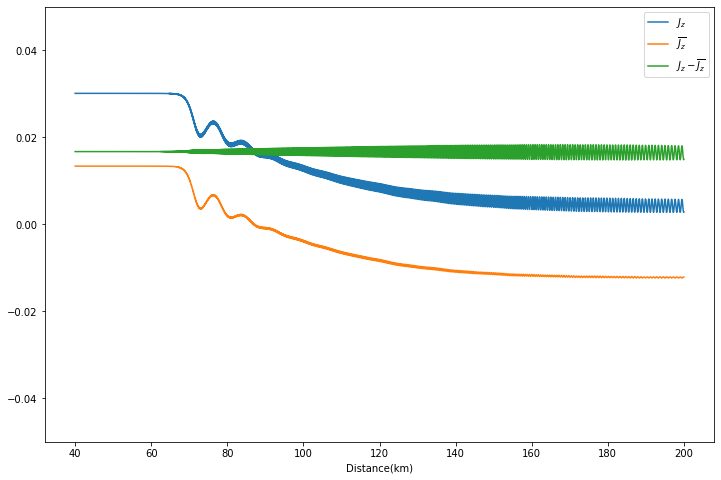

In [ ]:

plt.plot(t,J[:,2])
plt.plot(t,J_bar[:,2])
diff = J[:,2] - J_bar[:,2]
plt.plot(t,diff)
plt.xlabel('Distance(km)')
plt.ylim(-0.05,0.05)
plt.legend([r'$J_z$',r'$\overline{J_z}$',r'$J_z - \overline{J_z}$'])
plt.savefig('Dz_DOPr1e12_65E.jpeg')

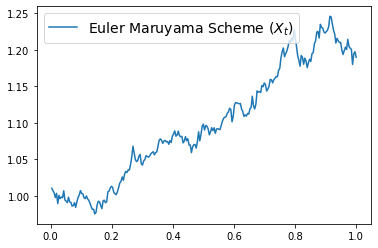

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)


a, b,c, X0 = 0.1, 0.3, 0.1,1.0

T = 1
N = 2**8
dt = 1.0 / N
t = np.arange(dt, 1 + dt, dt)

np.random.seed(1)
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)   #Integration

X_simulation, X = [], X0
for j in range(N):
    X += (a - b*np.log(X))*X*dt + c*X*dB[j]
    X_simulation.append(X)

plt.plot(t, X_simulation, label="Euler Maruyama Scheme ($X_t$)")
legend = ax.legend(loc='upper left', fontsize=14)
plt.show()

In [ ]:
X_simulation

# Single Angle Vectorized

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import RK45, odeint, solve_ivp

import matplotlib


matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.size']      = 10

In [ ]:
def Dist(r):
  R = 10
  return 0.5*(1-np.sqrt(1-(R/r)**2))**2

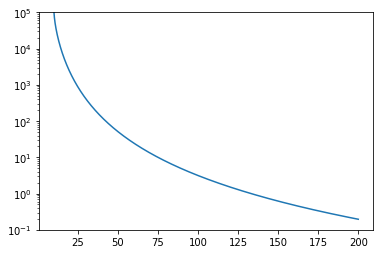

In [ ]:
r = np.linspace(10,200,10**5)
Mu = 2.5e5*Dist(r)
plt.yscale('log')
plt.ylim(1e-1,1e5)
plt.plot(r,Mu)

In [ ]:
from numpy.ma.core import take
class SN_wrap_v2():
  def __init__(self,n1):

    self.n1    = n1           #E bins
    if n1>1:
      self.E     = np.linspace(0,50,n1+1)[:-1]
      self.E    += (self.E[1]-self.E[0])*0.5
    else :
      self.E = [25]

    self.I = []
    for E_o in self.E:
      self.I.append(np.array([[self.A(E_o)]*3 + [self.B(E_o)]*3]))   #Creates an tensor with 3 copies of x's and y's to be multiplied by the P's and Pbar's

    self.I = np.array(self.I).reshape(self.n1,6)

    self.t     = None
    self.out   = None

    P0 = []
    for E_bin in self.E:
      P0 += self.P_init(E_bin)     #Makes copies of initial value for the T bins and E bins = P0
    P0 = np.array(P0)
    self.P0 = P0

  def init_E_P_theta(self):
    return self.P0.reshape(self.n1,6), self.E

  def __call__(self,t,P):

   return self.SN_self_v3(t,P,self.E,self.I)

  def Dist(self,t):
        R = 10
        return 0.5*(1-np.sqrt(1-(R/t)**2))**2

  def P_init(self,E):                    # Generates initial values of P and Pbar
    P1 =  [0,0,(self.phi(E,0.315)/10 - self.phi(E,0.131)/24)/(self.phi(E,0.315)/10 + self.phi(E,0.131)/24 )]
    P2 =  [0,0,(self.phi(E,0.210)/15 - self.phi(E,0.131)/24)/(self.phi(E,0.210)/15 + self.phi(E,0.131)/24 )]

    return P1 + P2                      #Returns a vector with dim 6

  def omega(self,E):                              # Vacuum potential calc func
    dm2 = 2 * 10**-9                              # In terms of eV
    conv = 0.506 * 10**10                         # conversion factor eV -> 1/km
    w = (dm2 * conv)/(2*E)
    return w

  def phi(self,E,beta):                  #Energy distribution function
    zeta =1.202
    return(2/3)*(beta/zeta)*(beta*E)**2/(np.exp(beta*E) + 1)

  def A(self, E):                        #E distribution of neutrinos =x
    return self.phi(E,0.315)/10 + self.phi(E,0.131)/24

  def B(self,E):                        #E distribution of anti-neutrinos =y
    return self.phi(E,0.210)/15 + self.phi(E,0.131)/24

  def SN_self_v3(self,t,P,E,I):    # Multiangle system definition

    dE      = 2*E[0]

    theta_v = 0.01                        # theta vacuum

    lambd   = 1.1474e6*pow(t,-2.263)         # Matter potential

    mu_p    = 5.3e5*self.Dist(t) #2.123e6*self.Dist(t)

    P       = P.reshape(self.n1,6)

    int_E   = (I*P).sum(axis=0)           #Does element wise multiplication of xP and yP_b and stores it in the object

    int_E   = int_E[0:3] - int_E[3:6]   #Separates xP and yP_b and subtracts it

    E_bin   = E

    int_D = 4*(int_E)*dE

    w = self.omega(E_bin)

    P1, P2 = P[:,0:3], P[:,3:6]

    H1 = (np.array(  [  w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w, lambd  + w*np.cos(2*theta_v)]).T.reshape(self.n1,3) + mu_p*int_D)

    H2 = (np.array(  [ -w*np.sin(2*theta_v)  + 0*t, 0 + 0*t*w , lambd - w*np.cos(2*theta_v)]).T.reshape(self.n1,3) + mu_p*int_D)

    dP1dt = np.cross(H1, P1)
    dP2dt = np.cross(H2, P2)

    dPdt = np.concatenate((dP1dt,dP2dt),axis=1)

    return dPdt

  def solver(self,t0=40,tf=200):

    t_span=(t0,tf)
    sol = RK45(self,t0,self.P0,tf,vectorized=True,rtol = 1e-6, atol = 1e-6)

    t_values = []
    y_values = []

    while(True):
      # Get solution step state
      sol.step()
      t_values.append(sol.t)
      y_values.append(sol.y)

      # Break loop after modeling is finished
      if sol.status == 'finished':
        break

    t   = np.array(t_values)
    out = np.array(y_values)

    self.t = t
    self.out = out.reshape(-1,self.n1,6)

    return self.t, self.out

  def show_plot(self,bins=None):
    if bins==None:
      E_bins = np.arange(0,self.n1,1)
    else :
      E_bins = bins
    fig,ax = plt.subplots(1,2,figsize=(30,8))

    for i in E_bins:
      ax[0].plot(t,self.out.reshape(-1,self.n1,6)[:,i,2],label = r'$P_z$({})'.format(E[i]))
      ax[0].legend()
      ax[0].set_xlabel('r(km)')
      ax[0].set_title(r'$P_z$', fontsize=15)

    for i in E_bins:
      ax[1].plot(t,self.out.reshape(-1,self.n1,6)[:,i,5],label = r'$\overline{P_z}$' + '({})'.format(E[i]))
      ax[1].legend()
      ax[1].set_xlabel('r(km)')
      ax[1].set_title(r'$\overline{P_z}$', fontsize=15)

  def J_J_bar(self):
     if self.out is not None:
      dE = 2*self.E[0]
      I = self.I
      int_D = (I*self.out).sum(axis=1)

      J     = int_D[:,0:3]*dE/2
      J_bar = int_D[:,3:6]*dE/2

      return J,J_bar

In [ ]:
SN_obj = SN_wrap_v2(n1=70)

P0, E = SN_obj.init_E_P_theta()

In [ ]:
t, out = SN_obj.solver()
print(E)

[ 0.35714286  1.07142857  1.78571429  2.5         3.21428571  3.92857143
  4.64285714  5.35714286  6.07142857  6.78571429  7.5         8.21428571
  8.92857143  9.64285714 10.35714286 11.07142857 11.78571429 12.5
 13.21428571 13.92857143 14.64285714 15.35714286 16.07142857 16.78571429
 17.5        18.21428571 18.92857143 19.64285714 20.35714286 21.07142857
 21.78571429 22.5        23.21428571 23.92857143 24.64285714 25.35714286
 26.07142857 26.78571429 27.5        28.21428571 28.92857143 29.64285714
 30.35714286 31.07142857 31.78571429 32.5        33.21428571 33.92857143
 34.64285714 35.35714286 36.07142857 36.78571429 37.5        38.21428571
 38.92857143 39.64285714 40.35714286 41.07142857 41.78571429 42.5
 43.21428571 43.92857143 44.64285714 45.35714286 46.07142857 46.78571429
 47.5        48.21428571 48.92857143 49.64285714]


In [ ]:
P0 = SN_obj.P0.reshape(SN_obj.n1,6)
P0.shape

(70, 6)

In [ ]:
P0[0,:]

array([0.        , 0.        , 0.93984448, 0.        , 0.        ,
       0.73319361])

In [ ]:
SN_obj.I.shape

(70, 6)

In [ ]:
SN_obj.I[0,:]

array([1.07581399e-04, 1.07581399e-04, 1.07581399e-04, 2.42558457e-05,
       2.42558457e-05, 2.42558457e-05])

In [ ]:
2*SN_obj.E[0]

0.7142857142857143

In [ ]:
int_E   = (SN_obj.I*P0).sum(axis=0)*(2*SN_obj.E[0])           #Does element wise multiplication of xP and yP_b and stores it in the object

int_E   = int_E[0:3] - int_E[3:6]   #Separates xP and yP_b and subtracts it

int_D = 4*int_E


In [ ]:
int_D

array([0.        , 0.        , 0.13387387])

In [ ]:
out.shape

(16118, 70, 6)

In [ ]:
t.shape

(16118,)

In [ ]:
print(SN_obj.E)

[ 0.35714286  1.07142857  1.78571429  2.5         3.21428571  3.92857143
  4.64285714  5.35714286  6.07142857  6.78571429  7.5         8.21428571
  8.92857143  9.64285714 10.35714286 11.07142857 11.78571429 12.5
 13.21428571 13.92857143 14.64285714 15.35714286 16.07142857 16.78571429
 17.5        18.21428571 18.92857143 19.64285714 20.35714286 21.07142857
 21.78571429 22.5        23.21428571 23.92857143 24.64285714 25.35714286
 26.07142857 26.78571429 27.5        28.21428571 28.92857143 29.64285714
 30.35714286 31.07142857 31.78571429 32.5        33.21428571 33.92857143
 34.64285714 35.35714286 36.07142857 36.78571429 37.5        38.21428571
 38.92857143 39.64285714 40.35714286 41.07142857 41.78571429 42.5
 43.21428571 43.92857143 44.64285714 45.35714286 46.07142857 46.78571429
 47.5        48.21428571 48.92857143 49.64285714]


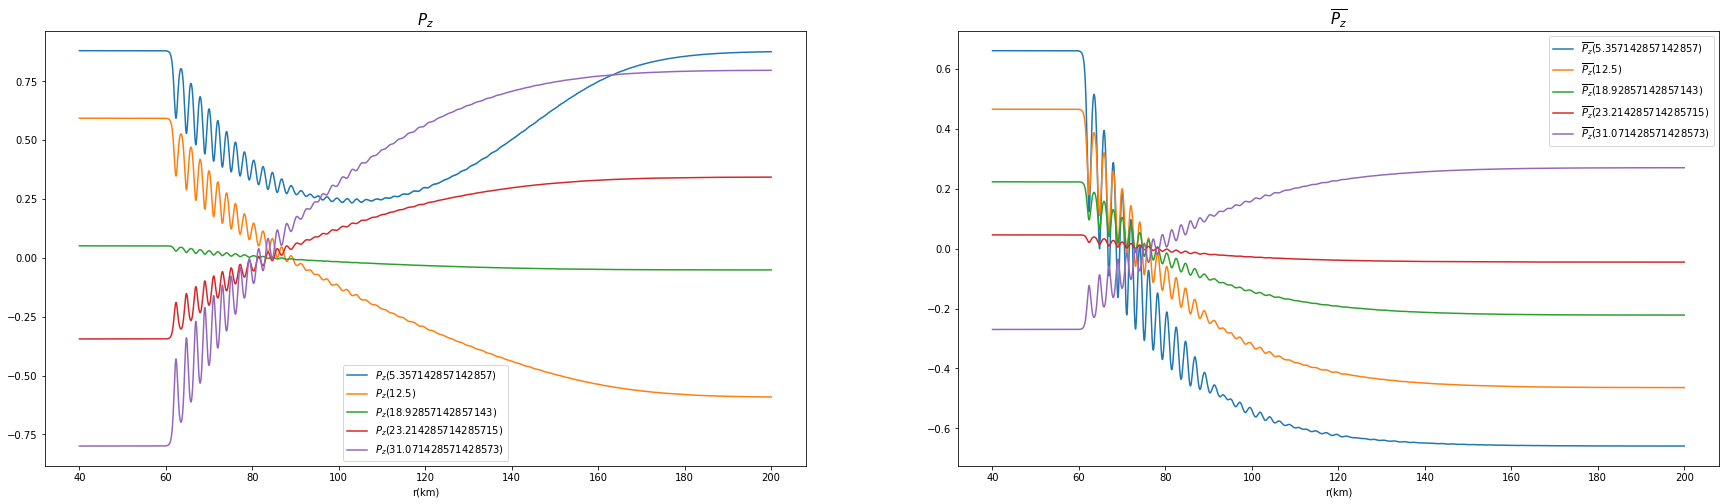

In [ ]:
SN_obj.show_plot(bins=[7,17,26,32,43]) #bins=[2,6,9,11,15] 70bins=[7,17,26,32,43] 50bins=[5,12,19,23,31]
plt.savefig('SingleAngle70Ebin.jpeg')

In [ ]:
J, J_bar = SN_obj.J_J_bar()
diff = J[:,2] - J_bar[:,2]

In [ ]:
diff

array([0.01673423, 0.01673423, 0.01673423, ..., 0.01673298, 0.01673691,
       0.01673858])

In [ ]:
diff.shape

(16118,)

In [ ]:
diff[2]

0.016734233717674997

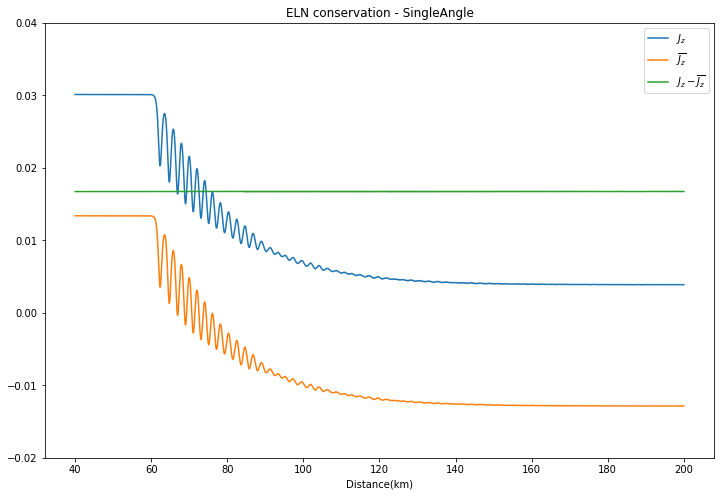

In [ ]:
plt.plot(t,J[:,2])
plt.plot(t,J_bar[:,2])
plt.plot(t,diff)
plt.xlabel('Distance(km)')
plt.ylim([-0.02,0.04])
plt.title('ELN conservation - SingleAngle')
plt.legend([r'$J_z$',r'$\overline{J_z}$',r'$J_z - \overline{J_z}$'])
plt.savefig('SingleAngleDz.jpeg')